In [1]:
import numpy as np
import properscoring as ps
import tensorflow as tf
from functions_for_TAQR import one_step_quantile_prediction
import pandas as pd
from multimodel_quantile_loss_network_working_TDS_article_functions import *

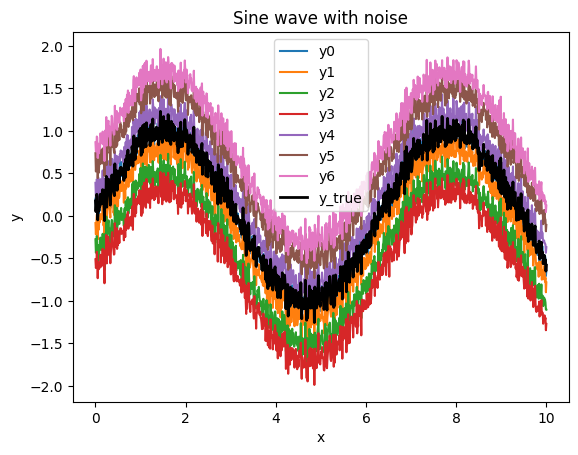

In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


# Generate the date, sine wave + noise
np.random.seed(0)
n = 1000
x = np.linspace(0, 10, n)
y = np.sin(x) + np.random.normal(0, 0.1, n)
noise_factor = 0.1
y_eps_0 = y + np.random.normal(0, noise_factor * 0.5, n)
y_eps_1 = y + np.random.normal(-0.2, noise_factor * 0.4 , n)
y_eps_2 = y + np.random.normal(-0.5, noise_factor * 0.3 , n)
y_eps_3 = y + np.random.normal(-0.7, noise_factor * 0.2 , n)
y_eps_4 = y + np.random.normal(0.2, noise_factor * 0.4 , n)
y_eps_5 = y + np.random.normal(0.5, noise_factor * 0.3 , n)
y_eps_6 = y + np.random.normal(0.7, noise_factor * 0.2 , n)


# plot
plt.plot(x, y_eps_0, label='y0')
plt.plot(x, y_eps_1, label='y1')
plt.plot(x, y_eps_2, label='y2')
plt.plot(x, y_eps_3, label='y3')
plt.plot(x, y_eps_4, label='y4')
plt.plot(x, y_eps_5, label='y5')
plt.plot(x, y_eps_6, label='y6')


plt.plot(x, y, label='y_true', linewidth=2, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine wave with noise')
plt.legend()
plt.show()

In [29]:

ensembles = pd.DataFrame({'y0': y_eps_0, 'y1': y_eps_1, 'y2': y_eps_2, 'y3': y_eps_3, 'y4': y_eps_4, 'y5': y_eps_5, 'y6': y_eps_6})
ensembles = ensembles[['y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6']]

actuals = y
quantiles = [0.1, 0.5, 0.9]

y_preds = {}
y_actuals = {}
for q in quantiles:
    y_pred, y_actual, BETA = one_step_quantile_prediction(ensembles, actuals, 200, 1000, q, False)
    y_preds[q] = y_pred
    y_actuals[q] = y_actual



Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  3 zeros in residuals and 3 close to zeroes
p:  3
3 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  3 zeros in residuals and 3 close to zeroes
p:  3
3 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  3 zeros in residuals and 3 close to zeroes
p:  3
3 r_init zeros


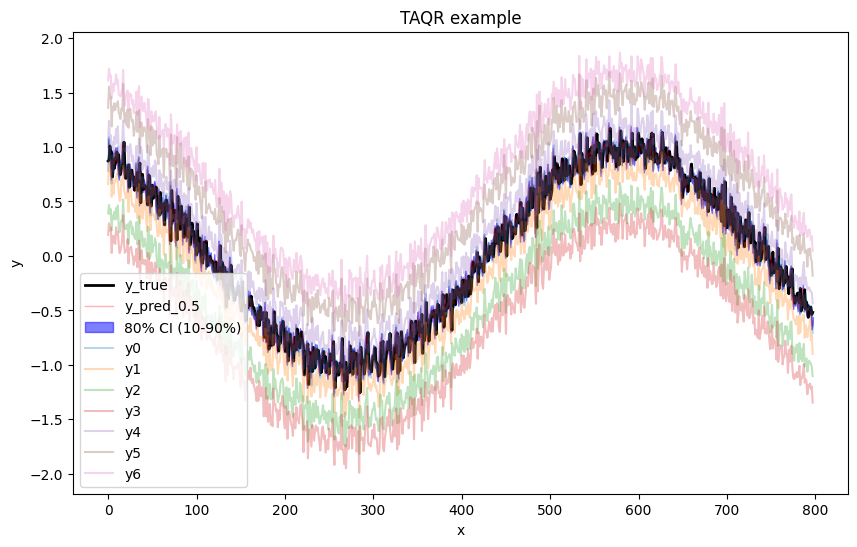

In [30]:
# plot
plt.figure(figsize=(10, 6))
plt.plot(y_actuals[0.5][:], label='y_true', linewidth=2, color='black')
# plt.plot(y_preds[0.1][:], label='y_pred_0.1', linewidth=1, color='blue', alpha = 0.3)
plt.plot(y_preds[0.5][:], label='y_pred_0.5', linewidth=1, color='red', alpha = 0.3)
# plt.plot(y_preds[0.9][:], label='y_pred_0.9', linewidth=1, color='blue', alpha = 0.3)
plt.fill_between(range(798), y_preds[0.1][:], y_preds[0.9][:], color='blue', alpha=0.5, label = "80% CI (10-90%)")
plt.plot(y_eps_0[201:999], label='y0', alpha = 0.3)
plt.plot(y_eps_1[201:999], label='y1', alpha = 0.3)
plt.plot(y_eps_2[201:999], label='y2', alpha = 0.3)
plt.plot(y_eps_3[201:999], label='y3', alpha = 0.3)
plt.plot(y_eps_4[201:999], label='y4', alpha = 0.3)
plt.plot(y_eps_5[201:999], label='y5', alpha = 0.3)
plt.plot(y_eps_6[201:999], label='y6', alpha = 0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('TAQR example')
plt.legend()
# plt.savefig('TAQR_example.pdf')
plt.show()